## Object

$$ J = \sum_{i, j=1}^{V}f(X_{ij})(Wi^{T}  Wj + b_{j} + b_{i} - log(X_{ij}))^{2} $$

In [21]:
from __future__ import division
from collections import defaultdict, Counter


import os
import tensorflow as tf
from random import shuffle
import jieba

In [43]:
corpus = """
著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。
我情窦开得比较早，五岁那年，我刚上一年级。我妈来接我时，还没放学，我就趴在窗沿上，满脸痴相，偷偷给她指，你看讲台上那是我们班长，好威风哦。
我妈笑眯眯看着，这不是考你们班第一的那个男娃娃嘛，我姑娘眼光不错。后来做作业背课文，我哭闹想偷懒。我妈也不恼，我听说你们班班长学习从来不怕辛苦，人家真的好优秀噻。这句话对于我简直是鸡血。我那两年学习的劲儿比谁都大，一堆奖状捧回家，甚至还当上了副班长，也有了上讲台“威风”一把的机会。这段暗恋夭折在三年级。课间玩追赶游戏，班长追，我们呜呜哇哇四处乱逃。
只有一个女孩子原地不动，眉眼间全是有把握的笑。他不会抓我的，她说，我们今天结婚了。嘎嘣一声。那天我失魂落魄，回到家就开始哭。我哪里比不上那个女生嘛，班长为什么不和我结婚。我妈把我搂在怀里，我女儿最优秀了，成绩又好，又是副班长，跳舞也好看，哪里比别人差。那为什么班长喜欢她不喜欢我。我妈捧着我的脸，大家都很喜欢你，但是那个女生虽然不是最优秀，她也是可以被人喜欢的。
不是只有第一名才有资格被喜欢哦。这句话我一直记到现在。有一段时间我很喜欢记日记，还学着同学的样子，把日记本摆在书桌上，用头发丝上了道暗锁。一个多星期了，也没人动它。日记是你的隐私，你要自己收好。我妈说。你外婆从来不会看我的日记本，我也不会偷偷去看你的。上高中的时候早恋，身边有同样“劣迹”的人都想方设法和父母打地道战，我不用。我分享恋爱中甜蜜的小事，我妈笑眯眯的听；
我们吵架的时候，我妈给我分析对错。你脾气也太臭了，不要老是欺负人家男孩子嘛，她每次说。你为什么不打断我的腿？我有时候问。这种事情怎么堵得住嘛。比起你把妈妈当仇人一样防着，妈妈更希望可以帮助你拥有更顺利更向上的感情。两个人一起进步，不要被幼稚的鸡毛蒜皮耽误了更多精力。我女儿对自己的责任心，我最相信了，你不会因为谈恋爱耽误自己前途的。她没有错，我和当时的男友互传纸条中，百分之七十都是数学题，还有压力倾诉和互相鼓励。家长会，班主任还邀请我爸作为优秀学生家长代表上台发言。大三时身边有朋友意外怀孕了，不敢告诉家长。我隐瞒了当事人身份，把这件事告诉了我妈。你叫你同学不要担心钱的事情，妈妈可以把钱给你，你借给她。
无论如何，一定要去正规医院，不要为了省钱伤害身体。我妈说。万一你被人强奸了，也不要怕，妈妈会陪着你去看医生。从小我妈就这么给我灌输。无论发生什么意外我们都不会骂你，但你一定不要瞒着妈妈，不然没有人在第一时间帮你，你会后悔一辈子。还是五岁那年，我第一次偷钱。技术很烂，我妈上完卫生间出来一摸包，立马就发现了不对劲。你为什么拿妈妈的钱？我妈这次很严肃。我想买个新书包，可是我没有钱。我快哭了。那妈妈的钱是偷拿别人钱得来的吗？不是，是辛苦赚来的。几天后，我妈列了份工资清单。洗碗、煮饭、扫地等等，都可以赚两三毛钱。不等第二学期开学，我就用自己赚来的钱买了最喜欢的那个包。尝到了赚钱的甜头，我就不满足于赚自家人的钱了。
上了大学，我开始做兼职，写稿子，各种方法赚零用。我爸嫌我不务正业，我妈给他洗脑，你姑娘提前接触接触社会才不会被骗嘛。兼职时遇到不讲理的同事，受了委屈，哭着给我妈打电话。她应该会豪气地要我别干了，又不差那两个钱，我想。你没做错就问心无愧，不用为了别人放弃机会。我妈语气很坚定。社会上这样的人你躲也躲不掉，就不用怕，搞好和其他同事的关系就好了。和她视频的时候，她经常会盯着屏幕看好久，然后乐呵呵夸一句，我姑娘怎么这么好看。我有时候压力很大，和她视频时不爱说话。她叫我，我就用不耐烦的哭腔吼。你现在情绪太激动了，和你说话我好怕哦。她就把电话挂掉。等我心情平复了，重新拨通给她道歉，她又笑眯眯盯着我看，我姑娘还是笑起来漂亮一点。小时候我们吵架，她从来不在我气头上逼我听道理。每次争吵过后，我起床睁开眼，枕头旁边都会放着她写的长长的信。我高考数学失利，高三暑假是人生最昏暗的时光。我妈一句也没说，丢下我爸和我弟，带着我跨大半个南方看海去了。
妈妈生下你不是为了让你去考名牌大学或者去赚大钱的，她说，什么东西都没有我女儿的开心重要。我情绪状态其实经常很糟糕。睡不着觉是常事，吃饭潦草是常事，暴躁起来把自己手臂掐得一道一道的，也发泄不出来。坚持不住了一定要和妈妈讲，妈妈带你去和心理医生聊聊。我妈说，不要觉得抑郁就会被歧视，医生诊出来生病了咱就治，没有人会说闲话，不能让我女儿生病了都没人管。我妈不是什么教育学家，也不是什么高知。她对我的教育，完全基于对一个平等独立的人格的信任和尊重。我很感激，也深知自己的幸运。她是我在这个世界上最大的眷恋，拥抱着她的爱，我知道我在任何时刻都不会孤立无援。感谢她，用她的温柔和理解，让我们拥有了一个完整幸福的家。想更新两个问题：对我弟是否同样的教育方式：自然不一样了。我弟开蒙晚，学什么都慢，属于那种能把家长气中风的孩子。所以我妈在我弟身上倾注的心血更多，从头至尾陪伴着他成长。而我从小不在父母身边长大，报喜不报忧，爸妈对我比较放心，一直以来都是放养政策。
为什么会情绪不稳定：我两岁时，父母就去他乡做生意了，二十来年父母给的陪伴只有零零星星。我在爷爷奶奶身边长大，五岁前寄人篱下，五岁时爸妈买了房。受到的更多的还是打击式教育。我妈的育儿观念虽然超前，隔着细细的电话线也只能说鞭长莫及。当然我爷爷奶奶也很爱我，我很感恩。个位数的年纪，我就开始异乡求学，一个月只有两三天假期的那种寄宿。大学之前应试教育12年，一学期一两次的我的家长会，只有三次是有人参加的。班主任不满，经常在班里冷嘲热讽指桑骂槐，我每次只能拼命表现得若无其事。哦，忘了说一句，我遭受的那些校园暴力，也都是老师挑起的，尽管我学习上一直勤勤恳恳，成绩也像样。
但这个很容易释然，我知道那不是我的错，教师师德使然。全班很多同学都曾经是受害者。
"""

In [23]:
class NotFitToCorpusError(Exception):
    pass

In [195]:
class Glove(object):
    def __init__(self, window_size,max_vocab_size,min_cooccurrence, embedding_size, 
                 coocurrence_max=100, alpha=0.75, batch_size=10, learning_rate=0.1):
        if type(window_size) == tuple:
            self.left_size, self.right_size = window_size
        else:
            self.left_size = self.right_size = window_size
        
        self.max_vocab_size = max_vocab_size
        self.min_cooccurrence = min_cooccurrence
        self.embedding_size = embedding_size
        self.coocurrence_max = coocurrence_max
        self.alpha = alpha
        self.batch_size = batch_size
        self.__embedding = None
        self.__cooccurrence_matrix = None
        self.learning_rate = learning_rate
        
    def _window(self, region, start, end):
        '''
        return list of words from start index to end index of region
        '''
        last_index = len(region) + 1
        return region[max(0, start): min(end, last_index) + 1]
    
    def _context_window(self, region):
        for i, word in enumerate(region):
            start = i - self.left_size
            end = i + self.right_size
            left_context = self._window(region, start, i-1)
            right_context = self._window(region, i+1, end)
            yield (left_context, word, right_context)
    
    def fit_corpus(self, corpus):
        self._fit_corpus(corpus, self.max_vocab_size, self.min_cooccurrence)
        self.build_model()
    
    def _fit_corpus(self, corpus, vocab_size, min_count):
        words = Counter()
        coocurrence_counts = defaultdict(float)
        for region in corpus:
            words.update(region)
            for left_context, word, right_context in self._context_window(region):
                # add 1 / distance to word pair
                for i, c in enumerate(left_context[::-1]):
                    coocurrence_counts[(word, c)] += 1 / (i + 1)
                for i, c in enumerate(right_context):
                    coocurrence_counts[(word, c)] += 1 / (i + 1)
        
        self.__words = [word for word, count in words.most_common(vocab_size) if count >= min_count]
        self.__word_2_id = {w: _id for _id, w in enumerate(self.__words)}
        self.__cooccurrence_matrix = {(self.__word_2_id[word_pair[0]], self.__word_2_id[word_pair[1]]): count
                                     for word_pair, count in coocurrence_counts.items()
                                     if word_pair[0] in self.__words and word_pair[1] in self.__words}
        
        
    def build_model(self):
        self.__graph = tf.Graph()
        with self.__graph.as_default():
            count_max = tf.constant([self.coocurrence_max], dtype=tf.float32, name='coocurrence_max')
            alpha = tf.constant([self.alpha], dtype=tf.float32, name='alpha')

            self.__focus_input = tf.placeholder(tf.int32, shape=[self.batch_size], name='focus_words')
            self.__context_input = tf.placeholder(tf.int32, shape=[self.batch_size], name='context_words')
            self.__cooccurrance_count = tf.placeholder(tf.float32, shape=[self.batch_size], name='cooccurrance_count')

            focus_embeddings = tf.Variable(tf.random_uniform([self.vocab_size, self.embedding_size], 1.0, -1.0, name='focus_embeddings'))
            context_embeddings = tf.Variable(tf.random_uniform([self.vocab_size, self.embedding_size], 1.0, -1.0, name='context_embeddings'))
            focus_bias = tf.Variable(tf.random_uniform([self.vocab_size], 1.0, -1.0, name='focus_bias'))
            context_bias = tf.Variable(tf.random_uniform([self.vocab_size], 1.0, -1.0, name='context_bias'))

            focus_emb = tf.nn.embedding_lookup([focus_embeddings], self.__focus_input)
            context_emb = tf.nn.embedding_lookup([context_embeddings], self.__context_input)
            focus_b = tf.nn.embedding_lookup([focus_bias], self.__focus_input)
            context_b = tf.nn.embedding_lookup([context_bias], self.__context_input)

            weighting_factor = tf.minimum(1.0, tf.pow(tf.div(self.__cooccurrance_count, count_max), alpha))

            embedding_product = tf.reduce_sum(tf.multiply(focus_emb, context_emb), 1)
            log_cooccurrence = tf.log(tf.to_float(self.__cooccurrance_count))

            distance_exp = tf.square(tf.add_n([embedding_product, focus_b, context_b, tf.negative(log_cooccurrence)]))
            loss_one = tf.multiply(weighting_factor, distance_exp)

            self.__total_loss = tf.reduce_sum(loss_one)
#             tf.summary.scalar('glove_loss', self.__total_loss)
            print(self.__total_loss)
            self.__optimizer = tf.train.AdagradOptimizer(self.learning_rate).minimize(self.__total_loss)
#             tf.summary = tf.summary.merge_all()
            self.combine_embedding = tf.add(focus_embeddings, context_embeddings, name='combine_embedding')

    def train(self, epochs):
        batches = self.__prepare_batches()
        total_step = 0
        
        with tf.Session(graph=self.__graph) as sess:
            tf.global_variables_initializer().run()
            
            for epoch in range(epochs):
                shuffle(batches)
                for batch_data in batches:
                    i_indexs, j_indexs, counts = batch_data
                    if len(counts) != self.batch_size:
                        continue
                    
                    feed_dict = {
                        self.__focus_input: i_indexs,
                        self.__context_input: j_indexs,
                        self.__cooccurrance_count: counts
                    }
                    sess.run([self.__optimizer, self.__total_loss], feed_dict=feed_dict)
                    total_step += 1
                
            self.__embedding = self.combine_embedding.eval()
     
    @property
    def words(self):
        if self.__words is None:
            raise NotFitToCorpusError('need to fit copus before start model')
        return self.__words
    
    @property
    def vocab_size(self):
        return len(self.words)
    
    @property
    def embeddings(self):
        if self.__embedding is None:
            raise NotFitToCorpusError('not fit')
        
        return self.__embedding
    
    def generate_tsne(self, path=None, size=(100, 100), word_count=1000, embeddings=None):
        if embeddings is None:
            embeddings = self.embeddings
        from sklearn.manifold import TSNE
        tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
        low_dim_embs = tsne.fit_transform(embeddings[:word_count, :])
        labels = self.words[:word_count]
        return _plot_with_labels(low_dim_embs, labels, path, size)
    
    def __prepare_batches(self):
        if self.__cooccurrence_matrix is None:
            raise NotFitToCorpusError(
                "Need to fit model to corpus before preparing training batches.")
        cooccurrences = [(word_ids[0], word_ids[1], count)
                         for word_ids, count in self.__cooccurrence_matrix.items()]
        i_indices, j_indices, counts = zip(*cooccurrences)
        return list(_batchify(self.batch_size, i_indices, j_indices, counts))
    
def _batchify(batch_size, *sequences):
    for i in range(0, len(sequences[0]), batch_size):
        yield tuple(sequence[i:i+batch_size] for sequence in sequences)

    
    


In [205]:
def _plot_with_labels(low_dim_embs, labels, path, size):
    import matplotlib.pyplot as plt
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    figure = plt.figure(figsize=size)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right',
                     va='bottom')
    if path is not None:
        figure.savefig(path)
        plt.close(figure)

In [196]:
corpus_list = corpus.split()

In [197]:
def split_words(cor):
    stop_words = [',', '.', '，', '。', ':', '：', '/', '；']
    cut_c = list(jieba.cut(cor))
    return [c for c in cut_c if c not in stop_words]

In [198]:
token = [split_words(cor) for cor in corpus_list]

In [199]:
glove = Glove(window_size=5,max_vocab_size=100, min_cooccurrence = 1, embedding_size=10)

In [200]:
glove.fit_corpus(token)

Tensor("Sum_1:0", shape=(), dtype=float32)


In [201]:
glove.words

['我',
 '的',
 '了',
 '你',
 '她',
 '我妈',
 '也',
 '就',
 '是',
 '都',
 '和',
 '不',
 '着',
 '上',
 '在',
 '妈妈',
 '说',
 '很',
 '钱',
 '给',
 '不是',
 '把',
 '会',
 '我们',
 '喜欢',
 '不要',
 '看',
 '那',
 '不会',
 '被',
 '人',
 '自己',
 '去',
 '更',
 '时',
 '班长',
 '嘛',
 '好',
 '有',
 '只有',
 '为什么',
 '最',
 '对',
 '没有',
 '什么',
 '五岁',
 '哦',
 '那个',
 '姑娘',
 '怕',
 '优秀',
 '他',
 '女儿',
 '又',
 '可以',
 '用',
 '身边',
 '父母',
 '我弟',
 '得',
 '还',
 '没',
 '笑眯眯',
 '想',
 '学习',
 '从来不',
 '一个',
 '开始',
 '哭',
 '别人',
 '一直',
 '同学',
 '要',
 '时候',
 '不用',
 '每次',
 '？',
 '两个',
 '多',
 '错',
 '我爸',
 '一定',
 '为了',
 '还是',
 '出来',
 '赚',
 '经常',
 '一句',
 '情绪',
 '让',
 '教育',
 '作者',
 '转载',
 '请',
 '比较',
 '那年',
 '偷偷',
 '讲台',
 '这',
 '考']

In [202]:
glove.train(10)

In [203]:
glove.embeddings

array([[-9.26825047e-01, -6.61560476e-01, -6.50861502e-01,
        -3.42054516e-02,  9.97085154e-01,  9.43562627e-01,
         8.27230573e-01, -1.08146238e+00, -1.16577551e-01,
         1.91516787e-01],
       [-2.40357473e-01, -1.17353654e+00, -4.24071878e-01,
        -2.82086551e-01,  6.27851903e-01,  1.03414965e+00,
        -2.58261263e-01,  2.35916793e-01,  6.57803178e-01,
         2.01409817e-01],
       [ 1.63139522e-01, -2.38664567e-01, -5.66116810e-01,
         1.82854056e-01,  5.88121355e-01,  1.09445512e-01,
         2.96869844e-01, -4.13810104e-01,  4.37228143e-01,
        -2.22444206e-01],
       [ 6.56829700e-02, -6.62913501e-01, -3.34232450e-02,
         4.71173644e-01,  5.36338426e-03, -7.23656714e-02,
        -7.36217976e-01, -4.55856770e-01,  7.46889234e-01,
         2.52067745e-01],
       [-7.98245549e-01, -2.14959458e-01, -7.37477005e-01,
        -1.69691041e-01,  2.45832220e-01, -1.91280529e-01,
        -2.97401309e-01, -4.13239777e-01, -6.67064309e-01,
         6.

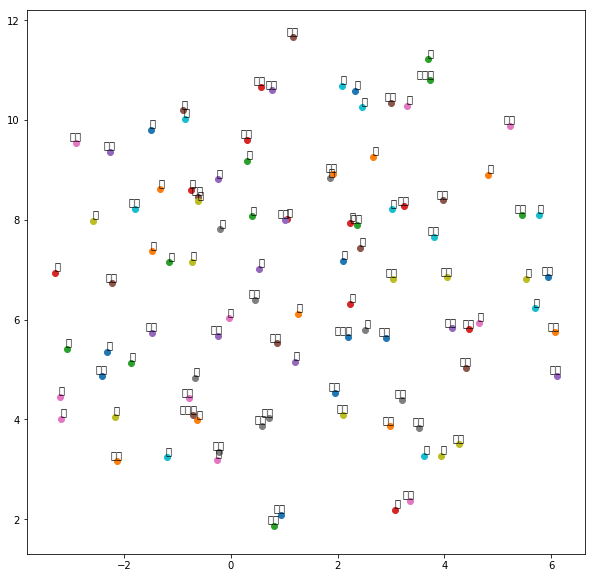

In [208]:
%matplotlib inline
glove.generate_tsne(size=(10,10))

In [209]:
glove.words

['我',
 '的',
 '了',
 '你',
 '她',
 '我妈',
 '也',
 '就',
 '是',
 '都',
 '和',
 '不',
 '着',
 '上',
 '在',
 '妈妈',
 '说',
 '很',
 '钱',
 '给',
 '不是',
 '把',
 '会',
 '我们',
 '喜欢',
 '不要',
 '看',
 '那',
 '不会',
 '被',
 '人',
 '自己',
 '去',
 '更',
 '时',
 '班长',
 '嘛',
 '好',
 '有',
 '只有',
 '为什么',
 '最',
 '对',
 '没有',
 '什么',
 '五岁',
 '哦',
 '那个',
 '姑娘',
 '怕',
 '优秀',
 '他',
 '女儿',
 '又',
 '可以',
 '用',
 '身边',
 '父母',
 '我弟',
 '得',
 '还',
 '没',
 '笑眯眯',
 '想',
 '学习',
 '从来不',
 '一个',
 '开始',
 '哭',
 '别人',
 '一直',
 '同学',
 '要',
 '时候',
 '不用',
 '每次',
 '？',
 '两个',
 '多',
 '错',
 '我爸',
 '一定',
 '为了',
 '还是',
 '出来',
 '赚',
 '经常',
 '一句',
 '情绪',
 '让',
 '教育',
 '作者',
 '转载',
 '请',
 '比较',
 '那年',
 '偷偷',
 '讲台',
 '这',
 '考']